# Preamble

#### Boot cell

Skip if `module_update.py` is in same folder as notebook, next cell downloads this file which in turn will download other files.

In [1]:
! curl -s "https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py" > "module_update.py"

#### Get essentials

Import text and graph modules for analysis, and css for display

In [2]:
from module_update import update, css, code_toggle, printmd

In [3]:
css()

In [4]:
code_toggle()

In [5]:
!

In [7]:
update('graph_networkx_louvain', overwrite=True)
update('nbtext', overwrite=True)
import nbtext as nb
import graph_networkx_louvain as gnl
import networkx as nx
from graph_networkx_louvain import cutdown, make_collocation_graph
from collections import Counter
import matplotlib.pyplot as plt

%matplotlib inline

Updated file `C:\Users\larsj\Documents\GitHub\Miscellaneous-Notebooks\graph_networkx_louvain.py`

Updated file `C:\Users\larsj\Documents\GitHub\Miscellaneous-Notebooks\nbtext.py`

In [8]:
import warnings

warnings.simplefilter("ignore")

# Analytic access to texts

## Aggregated
## Corpus
## Concordances/aggregated as collocations
## Document-term matrices
## Sequential analysis

# Aggregated




## Trend lines 


### demokrati, diktatur

In [9]:
sample = nb.nb_ngram("demokrati, diktatur", years=(1920, 2010), smooth=1)
sample.head()

demokrati  diktatur
1920   0.000417  0.000123
1921   0.000233  0.000213
1922   0.000416  0.000277
1923   0.000382  0.000328
1924   0.000100  0.000260

### demokrati, diktatur

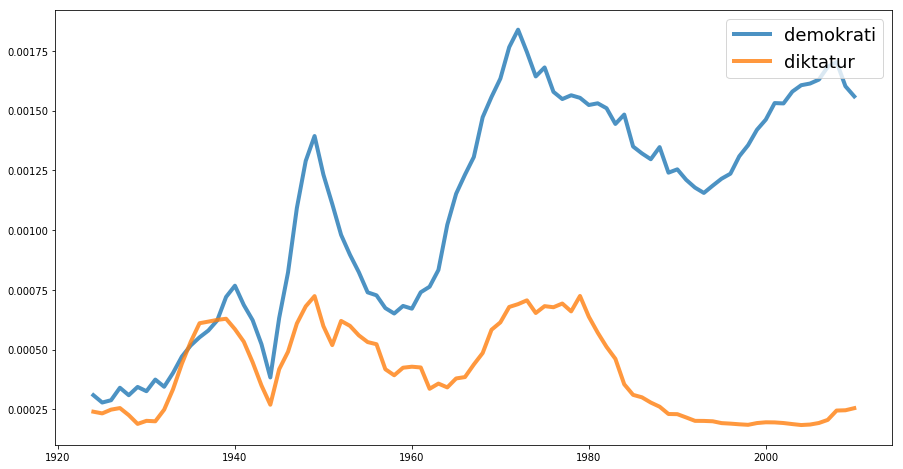

In [10]:
sample.rolling(window=5).mean().plot(figsize=(15,8), lw=4, alpha=0.8);
plt.legend(loc=1, prop={'size': 18});

## Tyskland, England, USA, Russland

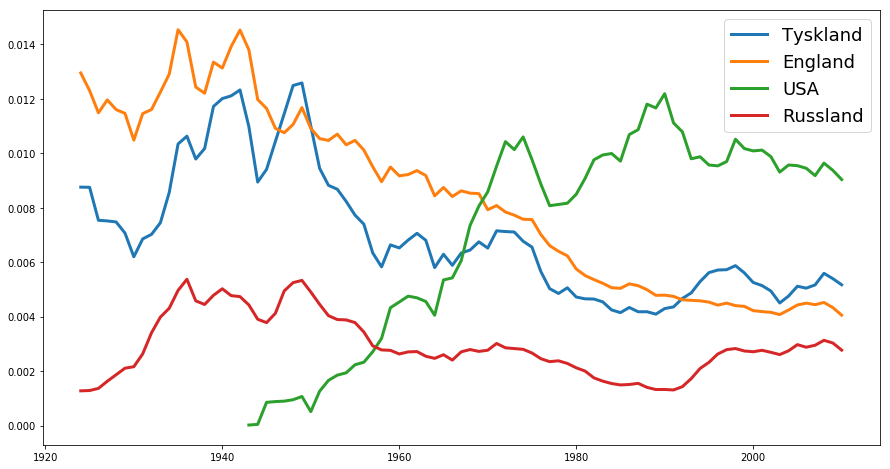

In [20]:
sample = nb.nb_ngram("Tyskland, England, USA, Russland", years=(1920, 2010), smooth=1)
sample.rolling(window=5).mean().plot(figsize=(15,8), lw=3);
plt.legend(loc=1, prop={'size': 18});

## USA, Amerika

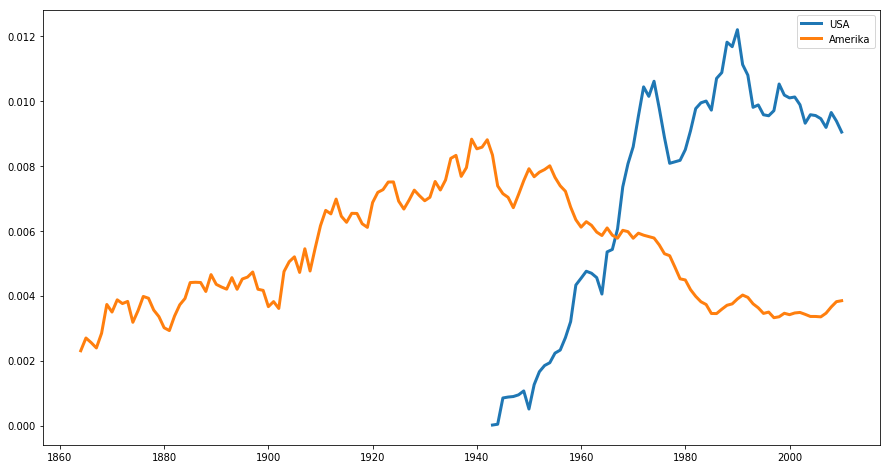

In [252]:
sample1 = nb.nb_ngram(" USA, Amerika", years=(1860, 2010), smooth=1)
sample1.rolling(window=5).mean().plot(figsize=(15,8), lw=3);

## Rusland, Russland

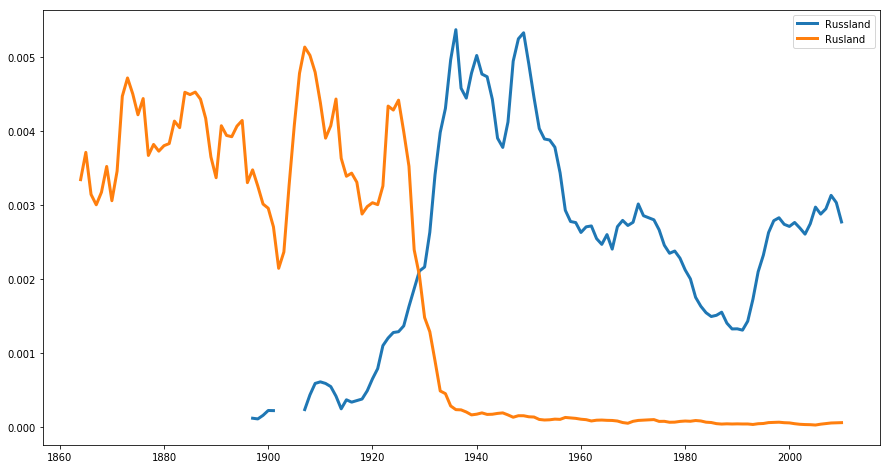

In [251]:
sample2 = nb.nb_ngram("Russland, Rusland", years=(1860, 2010), smooth=1)
sample2.rolling(window=5).mean().plot(figsize=(15,8), lw=3);

# Spelling variants OCR-errors

In [184]:
nb.sorted_wildcardsearch({'word':'Trond*m', 'factor':2}).head(10)

Trond*m
Trondheim  1267672
Trondhjem   244121
Trondhiem     7514
Trondbjem     1545
Trondhjæm     1051
Trondem        831
Trondhem       699
Trondeim       448
Trondhjcm      352
Trondkjem      264

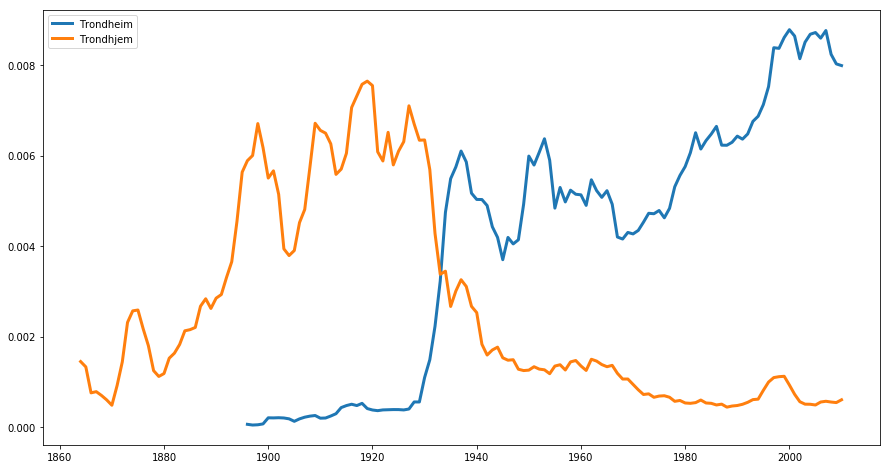

In [250]:
sample2 = nb.nb_ngram("Trondheim, Trondhjem", years=(1860, 2010), smooth=1)
sample2.rolling(window=5).mean().plot(figsize=(15,8), lw=3);

# Wordmodels

## Place name Os

In [248]:
G = nb.make_graph('Os', cutoff = 12)

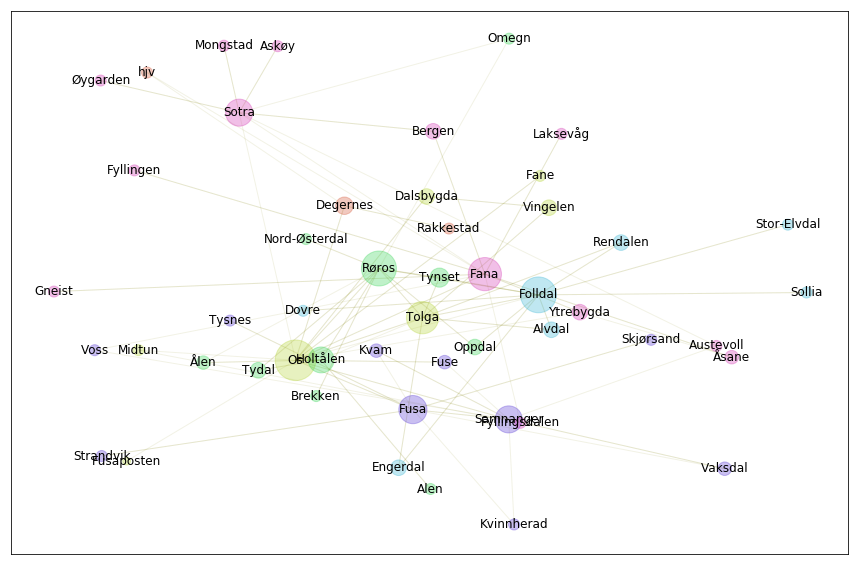

In [249]:
gnl.show_graph(G, spread = 1.9, fontsize=12)

# Galakse for 'Demokrati'

In [11]:
G_dem = nb.make_graph('demokrati', cutoff = 12)

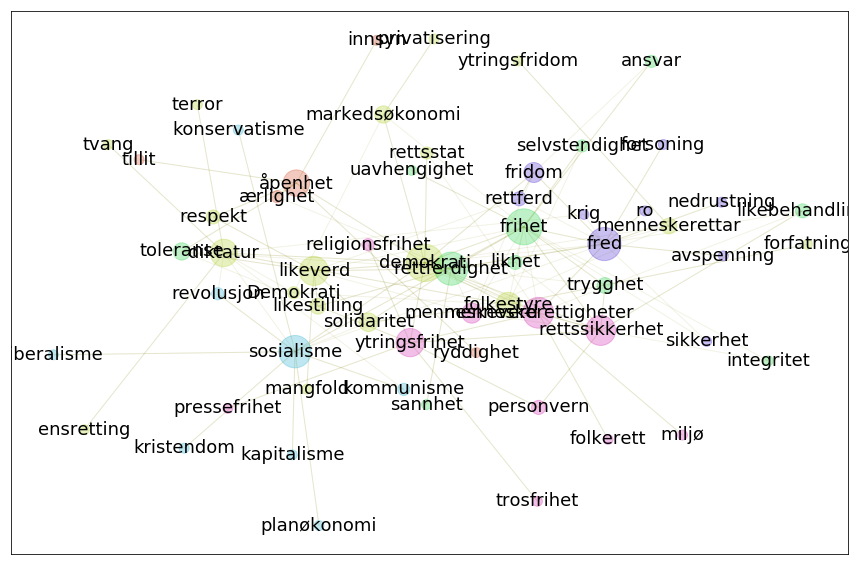

In [13]:
gnl.show_graph(G_dem, spread = 1.9, fontsize=18)

## Clusters

In [79]:
gnl.show_community(G)

1 Tolga, Midtun, Fane, Fusaposten, Dalsbygda, Os, Vingelen

2 Holtålen, Brekken, Alen, Tynset, Oppdal, Nord-Østerdal, Tydal, Røros, Omegn, Ålen

3 Engerdal, Folldal, Rendalen, Sollia, Alvdal, Dovre, Stor-Elvdal

4 Vaksdal, Fusa, Kvinnherad, Kvam, Skjørsand, Strandvik, Voss, Tysnes, Fuse, Samnanger

5 Sotra, Austevoll, Fyllingsdalen, Fyllingen, Laksevåg, Askøy, Fana, Øygarden, Ytrebygda, Åsane, Bergen, Mongstad, Gneist

6 Degernes, hjv, Rakkestad



True

## Cliques

In [80]:
gnl.show_cliques(G)

(3, 1) Engerdal, Tolga, Folldal, Holtålen, Tynset, Rendalen, Oppdal, Tydal, Røros, Os, Alvdal, Ålen

(3, 2) Vaksdal, Samnanger, Fusa, Kvinnherad, Kvam, Fuse, Os

(3, 3) Sotra, Fana, Ytrebygda, Åsane, Bergen, Os

(4, 1) Tolga, Folldal, Holtålen, Tynset, Røros, Os



## Place 'Flå'

In [90]:
G2 = nb.make_graph('Flå', cutoff = 10)

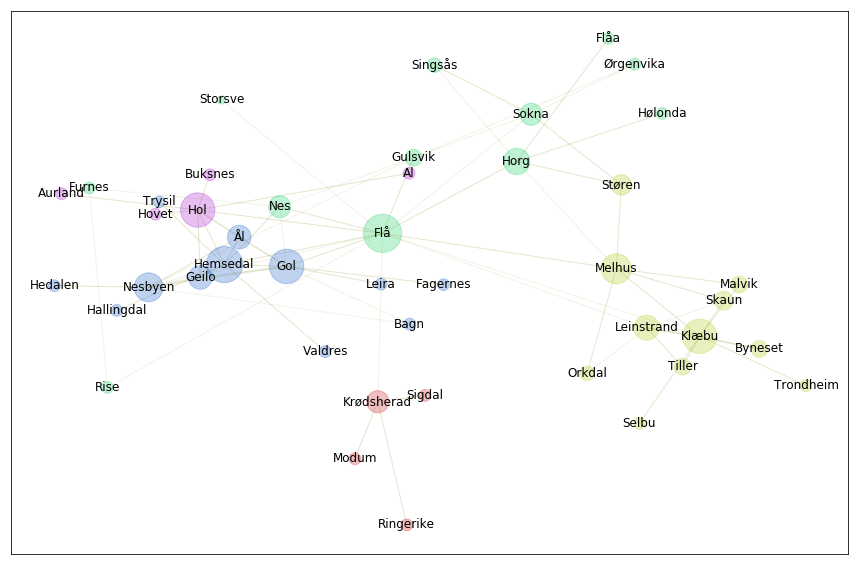

In [246]:
gnl.show_graph(G2, spread = 1.4, fontsize=12)

## Clusters

In [92]:
gnl.show_community(G2)

1 Tiller, Trondheim, Leinstrand, Malvik, Byneset, Skaun, Støren, Selbu, Orkdal, Melhus, Klæbu

2 Nes, Ørgenvika, Horg, Singsås, Furnes, Gulsvik, Rise, Storsve, Hølonda, Flå, Sokna, Flåa

3 Trysil, Fagernes, Gol, Ål, Geilo, Bagn, Hemsedal, Leira, Nesbyen, Hallingdal, Hedalen, Valdres

4 Hovet, Aurland, Hol, Al, Buksnes

5 Krødsherad, Modum, Sigdal, Ringerike



True

## Cliques

In [93]:
gnl.show_cliques(G2)

(3, 1) Nes, Gol, Ål, Geilo, Bagn, Gulsvik, Hemsedal, Hol, Nesbyen, Flå, Sokna

(3, 2) Tiller, Horg, Leinstrand, Malvik, Byneset, Skaun, Støren, Flå, Melhus, Klæbu

(4, 1) Nes, Gol, Ål, Geilo, Hemsedal, Hol, Nesbyen, Flå



# Books (and Newspapers)

### URN unique identifiers like: https://urn.nb.no/URN:NBN:no-nb_digibok_2009020200037 

## Corpus defined by some criteria

In [115]:
korpus = nb.get_urn({'year':1820, 'next': 100, 'limit':300})
nb.frame(korpus[:10])

0                      1  \
0  2013060408009     Nicolai, Georg Fr.   
1  2009062201053           Jensen, Joh.   
2  2010070506032        Ludvigsen, Axel   
3  2014091106032       Hagerup, Francis   
4  2013040308049       Johannesen, Ant.   
5  2007081310006  Winterhjelm, Kristian   
6  2013120624006                          
7  2014032706147        Magelssen, N.S.   
8  2016051948047        Madsen, Johanne   
9  2008102912002    Asbjørnsen, P. Chr.   

                                                   2     3  
0                                    Krigens biologi  1918  
1  Exempelsamling til Brug ved den første grammat...  1870  
2  Supplement til Englands Historie i L.R. Daas L...  1878  
3                                 norske civilproces  1918  
4  Lærebok i det dobbelte bogholderi med opgavesa...  1920  
5          Af Kristiania teaterliv i den seneste tid  1875  
6  Description de l'Égypte, ou Recueil des observ...  1824  
7                                 Familien Magelssen  1910  
8                                      Karakterbogen  1908  
9         De tre Bjørne, eller Besøget i Bjørnestuen  1864

# Concordances 

In [197]:
nb.get_urnkonk('Trøndelag', {
    'urns':korpus[:50],
    'before': 10,
    'after': 10,
    'size':5
}, html=True)

# Collocation

# Compare with all

In [16]:
tot = nb.frame(nb.totals(30000))

In [ ]:
nb.normalize_corpus_dataframe(tot)

In [255]:
tot.head(20)

0
.    1265723110
,    1105303412
og    543432056
i     460246057
det   273411583
som   265144740
til   254500136
er    248764786
av    235180661
en    231631623
på    205990369
for   202452659
at    199527660
-     195716474
å     184201667
med   182427175
)     172258528
var   153392365
?     151860120
den   151216998

## Modern corpus 300 books

In [122]:
korpus = nb.get_urn({'year':1960, 'next': 100, 'limit':300})
nb.frame(korpus[:10])

0                  1  \
0  2011090206097  Butterworth, Nick   
1  2013011407005    Norum, Kaare R.   
2  2014012909014                      
3  2013070406053   Jansen, Eilev S.   
4  2008011000118        Risk, Mary.   
5  2011022209071    Davidsen, Hanne   
6  2012081408145  Dalen, Dag Morten   
7  2011071308029    Klungsøyr, Johs   
8  2012061106121   Alexander, Anton   
9  2012091109060     Haukebø, Trond   

                                                   2     3  
0  Sauen som gikk seg bort og sju andre jesusfort...  2005  
1                               Kosthald og ernæring  1984  
2                          Magnetpulver og penetrant  1993  
3                                             SMÅRIK  1986  
4                                          nytt hjem  1993  
5             FoU-virksomheten ved Høgskolen i Nesna  2000  
6                 Styring av statlig prosjektledelse  2004  
7      Bilen og folket i Hareid og Ulstein 1916-1961  2007  
8                   Matematisk geografi for gymnaset  1976  
9     Prøvefiske i Kilstivatnet Norddal kommune 1984  1988

In [127]:
coll = nb.urn_coll('demokrati', urns=korpus)

In [128]:
nb.normalize_corpus_dataframe(coll)

True

In [129]:
diff = (coll**1.2/tot).sort_values(by = 0, ascending = False)

# Kollokasjoner for *Demokrati*  fra korpus

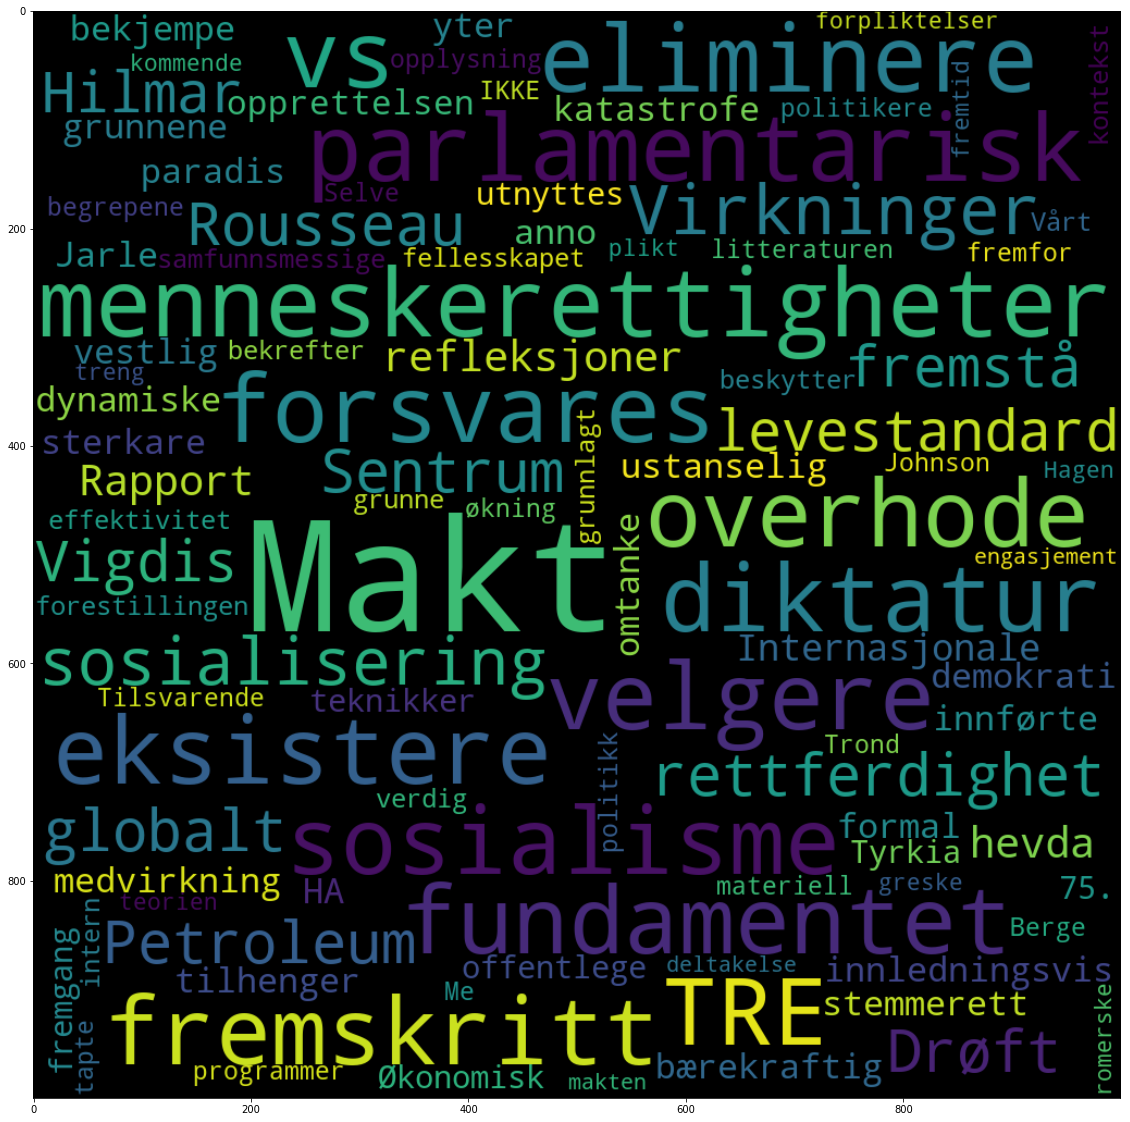

In [245]:
nb.cloud(diff.head(100)/diff.head(100).sum(), stretch=4)

# Place name Tyskland

In [152]:
coll2 = nb.urn_coll('Tyskland', urns=korpus)

In [153]:
nb.normalize_corpus_dataframe(coll2)

True

In [154]:
diff2 = (coll2**1.5/tot).sort_values(by = 0, ascending = False)

In [166]:
d2 = nb.frame(diff2[0].loc[[x for x in diff2.index if x.isalpha()]])

In [169]:
#d2.head(20)

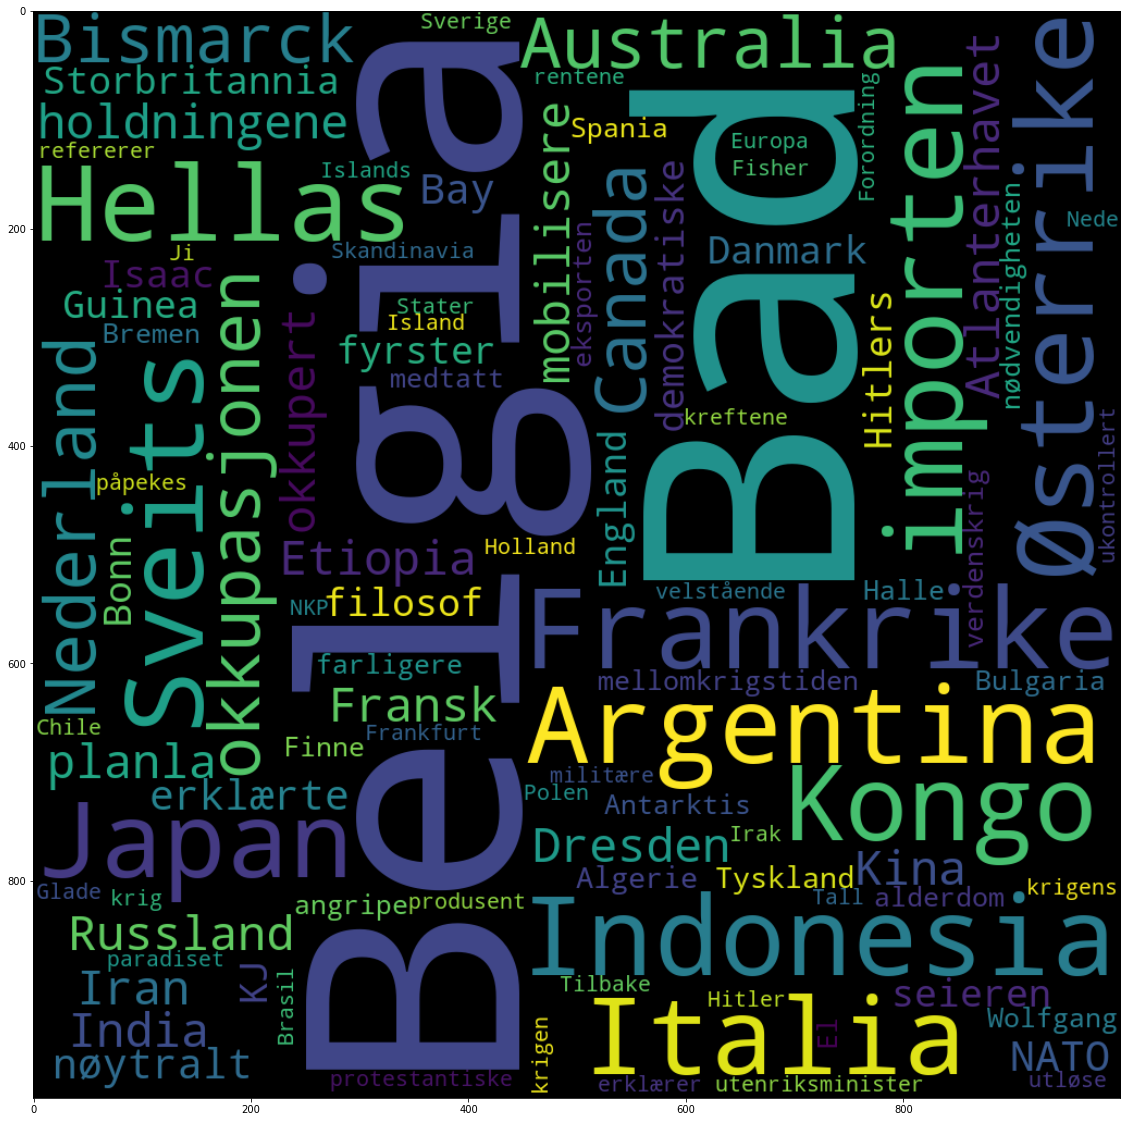

In [244]:
nb.cloud(d2.head(100)/d2.head(100).sum(), stretch=4)

# Names

In [201]:
books = nb.get_urn({'author':'fløgsta%'})

In [202]:
books

[[2012110206063,
  'Fløgstad, Anne',
  'Økosystem-dynamikk i et marginalt område',
  1998],
 [2012102306092, 'Fløgstad, Kjartan', 'Rasmus', 1974],
 [2008110504006, 'Fløgstad, Kjartan', 'Dalen Portland', 2000],
 [2009010804043, 'Fløgstad, Kjartan', 'Fyr og flamme', 2000],
 [2013041807070, 'Fløgstad, Kjartan', 'Dalen Portland', 1985],
 [2008070800086, 'Fløgstad, Kjartan', 'Fyr og flamme', 1996],
 [2008011601013, 'Fløgstad, Kjartan', 'Dikt og spelmannsmusikk', 1993],
 [2014100338018, 'Fløgstad, Kjartan', 'Fangliner', 1992],
 [2008020404064, 'Fløgstad, Kjartan', 'Fimbul', 1994],
 [2014010906022, 'Fløgstad, Kjartan', 'Språkets forkledning', 1991]]

In [204]:
F = nb.navn(2008110504006)

In [206]:
Removals = nb.spurious_names(300)

In [207]:
Removals = Removals + ['Hvem', 'Hva', 'Hvorfor', 'Hei', 'Okay']

In [209]:
Fn = nb.check_navn(F, remove=Removals)

In [211]:
Fg = nb.make_network_graph(2008110504006, Fn)

# Dalen Portland, Fløgstad

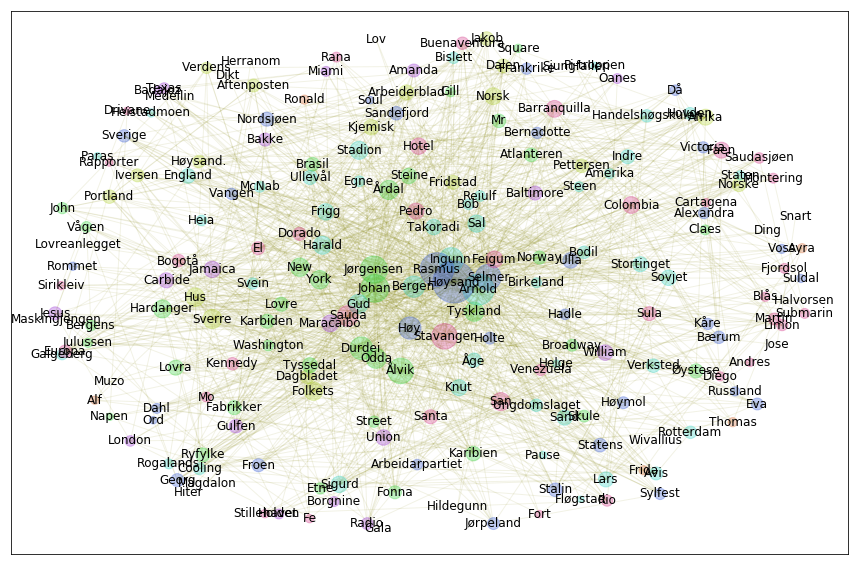

In [216]:
gnl.show_graph(Fg, spread=1.5, fontsize=12)

# Clustering of names

In [215]:
gnl.show_communities(Fg)

Sverre-Folkets :  Sverre, Folkets, Hus, Norsk, Afrika, Kjemisk, Arbeiderblad, Dagbladet, Fridstad, Jakob, Norske, Portland, Dalen, Pettersen, Aftenposten, Iversen, Høysand., Verdens, Magdalon

Johan-Jørgensen :  Johan, Jørgensen, Ålvik, Durdei, Odda, Tyskland, Årdal, York, New, Hardanger, Jamaica, Steine, Tyssedal, Lovra, Karibien, Øystese, Fabrikker, Ryfylke, Karbiden, Lovre, Brasil, Mr, Atlanteren, Georg, Fonna, Norway, Skule, Radio, Broadway, Street, John, Bergens, Vågen, Washington, Gill, Claes, Julussen, Square, Lovreanlegget

Arnold-Selmer :  Arnold, Selmer, Ingunn, Høy, Harald, Sal, Knut, Takoradi, Lars, Sand, Stortinget, England, Indre, Verksted, Avis, Froen, Bodil, Rotterdam, Ungdomslaget, Eva, Hovden, Høymol, Cooling, Egne, Reiulf, Arbeidarpartiet, Hadle, Amerika, Rogalands, Steen, Birkeland, Russland, Staten, Heistadmoen, Suldal, Paras, Pause, Soul, Helge, Pi-troppen, Fløgstad, Halvorsen, Lov, Wivallius

Høysand-Rasmus :  Høysand, Rasmus, San, Pedro, Sovjet, Ulla, Åge, Nords

# The clusters development in the book

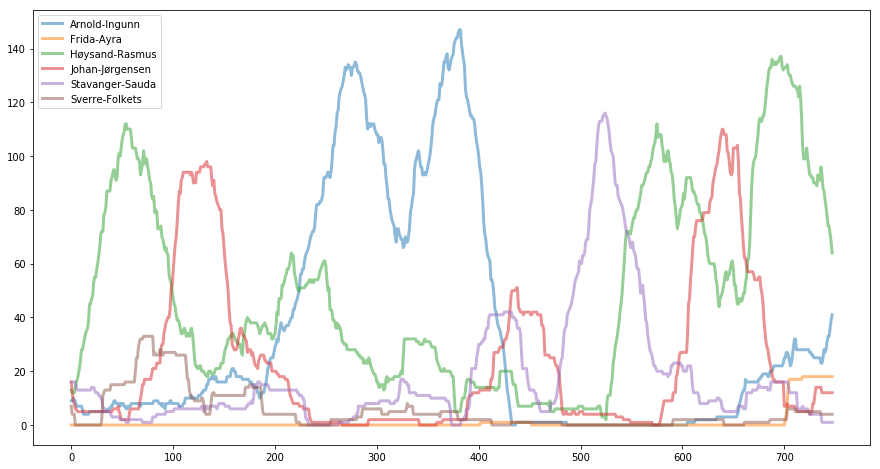

In [256]:
nb.plot_book_wordbags(2008110504006, gnl.community_dict(Fg)).plot(figsize=(15,8), lw=3, alpha=0.5);

# Network structure - betweennes

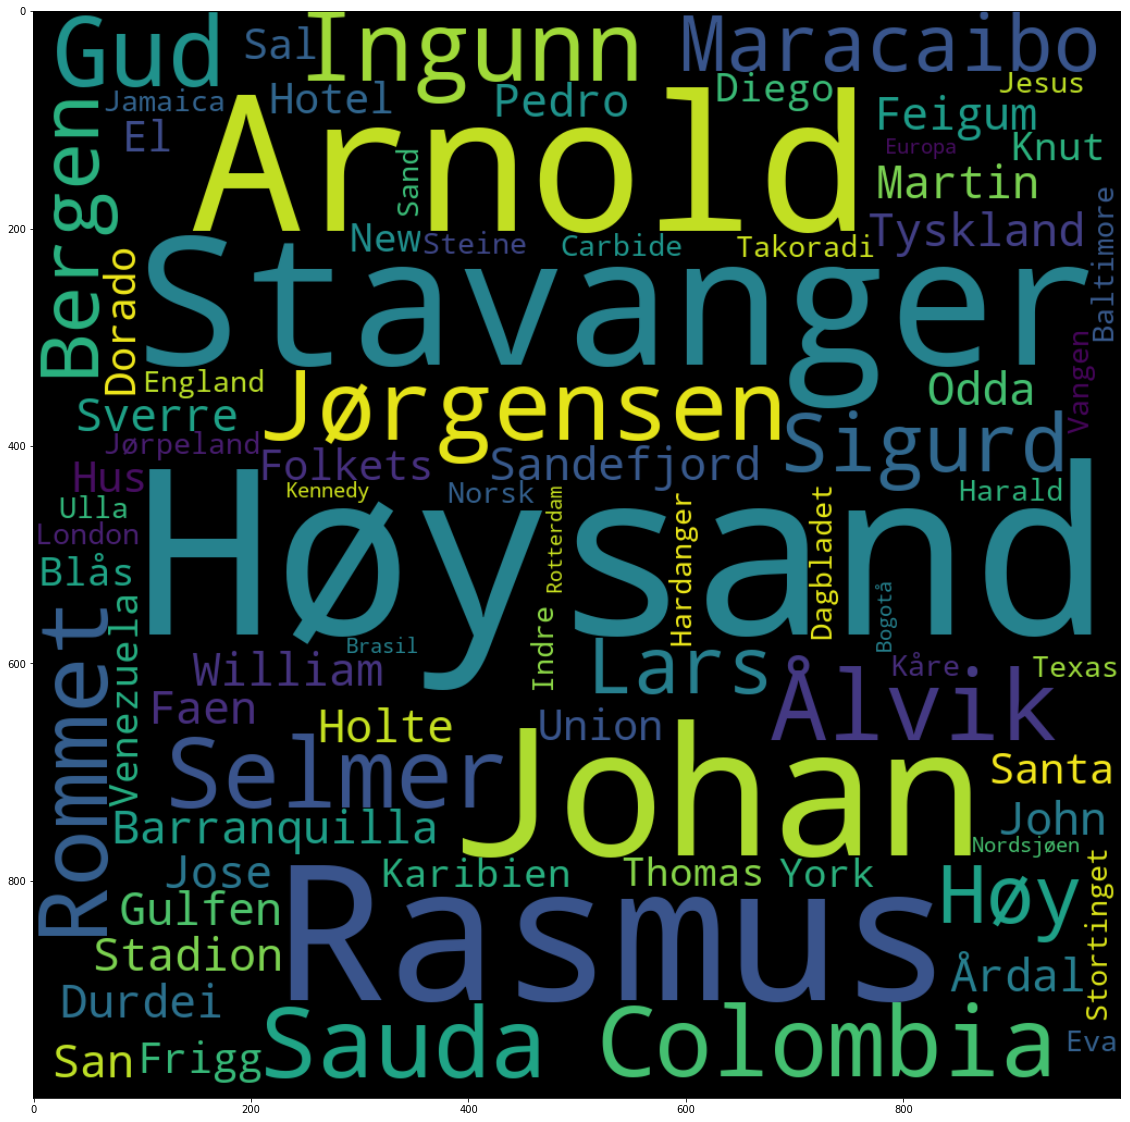

In [257]:
nb.cloud(nb.frame(dict(nb.central_betweenness_characters(Fg, 80))), stretch=3);

# Agnar Mykle, Sangen om den Røde Rubin

In [233]:
nb.get_urn({'author':'Mykle%', 'title': 'sang%', 'year':1955, 'next':60})

[[2009033100094, 'Mykle, Agnar', 'Sangen om den røde rubin', 2002],
 [2008021404040, 'Mykle, Agnar', 'Sangen om den røde rubin', 1995],
 [2009011504069, 'Mykle, Agnar', 'Sangen om den røde rubin', 2000],
 [2007052404016, 'Mykle, Agnar', 'Sangen om den røde rubin', 1967],
 [2008100104083, 'Mykle, Agnar', 'Sangen om den røde rubin', 1998],
 [2016020808126, 'Mykle, Agnar', 'Sangen om den røde rubin', 2000],
 [2008111304085, 'Mykle, Agnar', 'Sangen om den røde rubin', 2001],
 [2015090129001, 'Mykle, Agnar', 'Sangen om den røde rubin', 1956],
 [2008021104029, 'Mykle, Agnar', 'Sangen om den røde rubin', 1995]]

In [234]:
navn = nb.navn('2016020808126')

In [235]:
navn = nb.check_navn(navn, limit=10)

In [236]:
navn

{'Abrahamsen': 22,
 'Ask': 874,
 'Burlefot': 23,
 'Constance': 63,
 'Daniel': 121,
 'Daniels': 11,
 'Doffen': 105,
 'Du': 92,
 'Eirik': 46,
 'Embla': 84,
 'Er': 35,
 'Fiffolo': 41,
 'Floden': 32,
 'Francis': 29,
 'Frankrike': 18,
 'Gud': 88,
 'Guds': 13,
 'Gunnhild': 19,
 'Har': 26,
 'Hitler': 15,
 'Hm': 18,
 'Maia': 18,
 'Marx': 12,
 'Molly': 36,
 'Norge': 39,
 'Oslo': 13,
 'Poppi': 22,
 'Robert': 68,
 'Sosialistisk': 26,
 'Stabell': 35,
 'Stallen': 33,
 'Studentersamfunnet': 16,
 'Studentlag': 24,
 'Synnøve': 11,
 'Takk': 15,
 'Taraldsen': 20,
 'Tyskland': 25,
 'Vil': 15,
 'Villsvinsen': 25,
 'Wilhelmine': 44,
 'Wolfgang': 28,
 'Økonomiske': 44}

In [237]:
G = nb.make_network(2016020808126, navn)

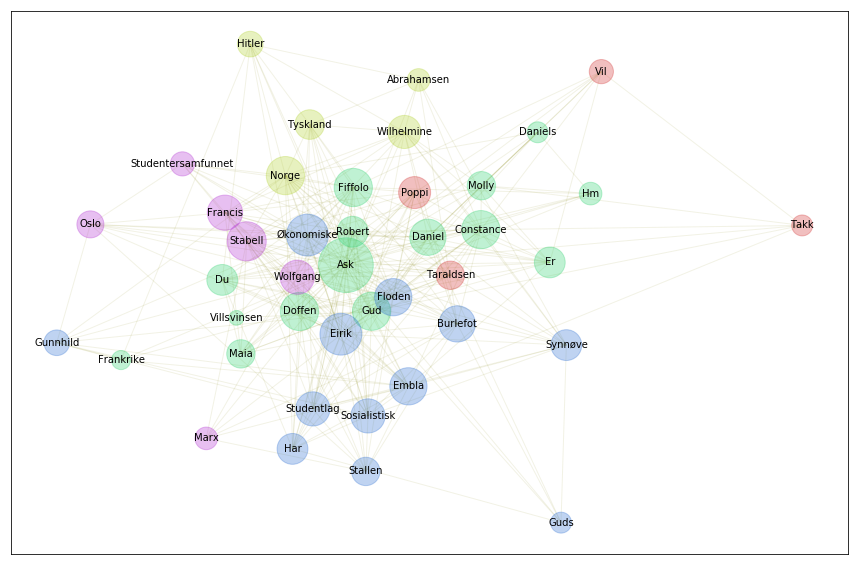

In [238]:
gnl.show_graph(G)

In [240]:
gnl.show_communities(G)

Norge-Wilhelmine :  Norge, Wilhelmine, Tyskland, Hitler, Abrahamsen

Ask-Fiffolo :  Ask, Fiffolo, Doffen, Gud, Wolfgang, Poppi, Du, Robert, Maia, Taraldsen, Frankrike, Villsvinsen

Økonomiske-Eirik :  Økonomiske, Eirik, Embla, Floden, Burlefot, Sosialistisk, Studentlag, Har, Synnøve, Stallen, Gunnhild, Marx, Guds

Constance-Daniel :  Constance, Daniel, Er, Molly, Vil, Hm, Takk, Daniels

Stabell-Francis :  Stabell, Francis, Oslo, Studentersamfunnet



## Development of clusters

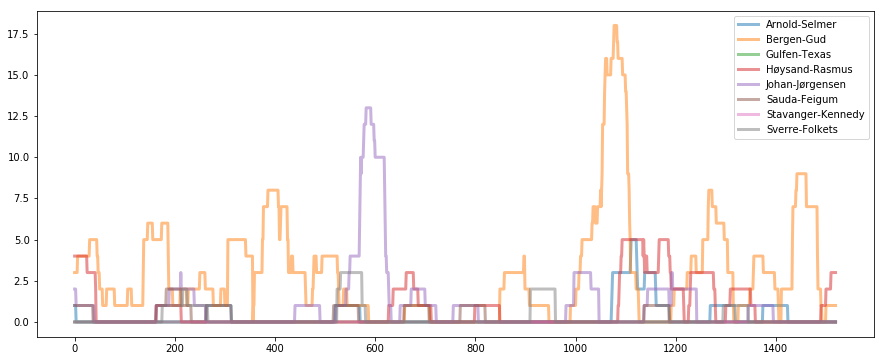

In [241]:
nb.plot_book_wordbags(2016020808126, gnl.community_dict(Fg)).plot(figsize=(15,6), lw=3, alpha=0.5);